/home/pi/Project/github/psaghelyi/smartcottage/.venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/pi/Project/github/psaghelyi/smartcottage/.venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/pi/Project/github/psaghelyi/smartcottage/.venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

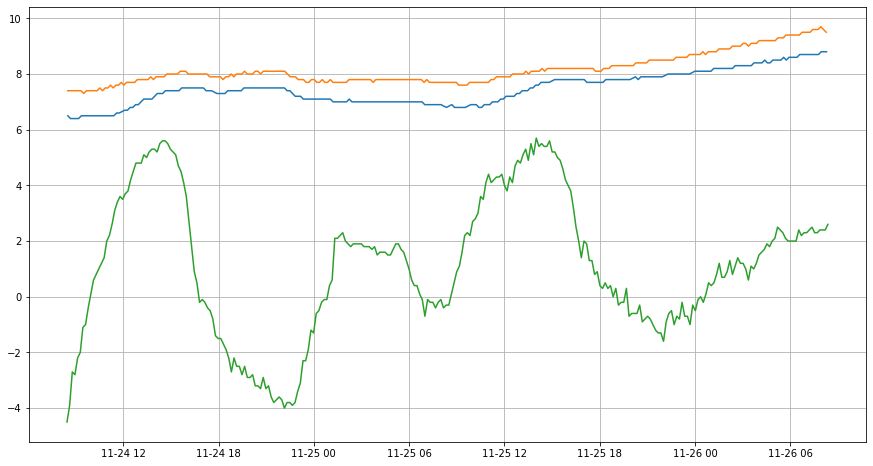

In [3]:
import requests
import datetime
import pytz
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib widget

LIMIT=500

tz = pytz.timezone("Europe/Budapest")

fig, ax = plt.subplots(figsize=(15, 8))

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s1?limit={LIMIT}", verify=False)
j = response.json()
x1 = [datetime.datetime.fromtimestamp(i['epoch'], tz) for i in j]
y1 = [i['data']['temperature'] for i in j]

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s2?limit={LIMIT}", verify=False)
j = response.json()
x2 = [datetime.datetime.fromtimestamp(i['epoch'], tz) for i in j]
y2 = [i['data']['temperature'] for i in j]

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s3?limit={LIMIT}", verify=False)
j = response.json()
x3 = [datetime.datetime.fromtimestamp(i['epoch'], tz) for i in j]
y3 = [i['data']['temperature'] for i in j]


ax.plot(x1,y1)
ax.plot(x2,y2)
ax.plot(x3,y3)
ax.grid(True)

# annotation
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points")
annot.set_visible(False)



/home/pi/Project/github/psaghelyi/smartcottage/.venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/pi/Project/github/psaghelyi/smartcottage/.venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/pi/Project/github/psaghelyi/smartcottage/.venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

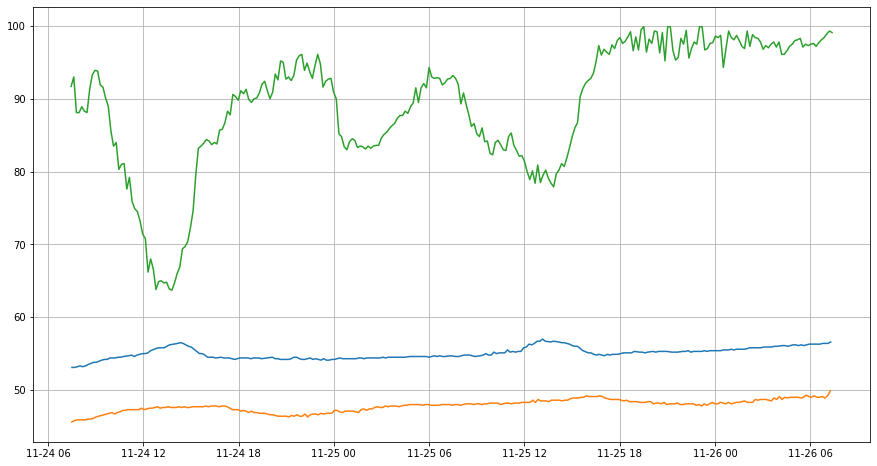

In [4]:
import requests
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

LIMIT=500

fig, ax = plt.subplots(figsize=(15, 8))

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s1?limit={LIMIT}", verify=False)
j = response.json()
x1 = [datetime.datetime.fromtimestamp(i['epoch']) for i in j]
y1 = [i['data']['humidity'] for i in j]

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s2?limit={LIMIT}", verify=False)
j = response.json()
x2 = [datetime.datetime.fromtimestamp(i['epoch']) for i in j]
y2 = [i['data']['humidity'] for i in j]

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s3?limit={LIMIT}", verify=False)
j = response.json()
x3 = [datetime.datetime.fromtimestamp(i['epoch']) for i in j]
y3 = [i['data']['humidity'] for i in j]


ax.plot(x1,y1)
ax.plot(x2,y2)
ax.plot(x3,y3)
ax.grid(True)


In [1]:


import csv
import influxdb

client = influxdb.InfluxDBClient(host='127.0.0.1', port=8086, database='smartcottage')

with open('cottage.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        item = {
            "measurement": "cottage",
            "tags": {
                "sensor": str(row[3])
            },
            "time": int(row[1]),
            "fields": {"temperature": float(row[4]), "humidity": float(row[2])}
        }
        # client.write_points([item])

        print(item)

client.close()

{'measurement': 'cottage', 'tags': {'sensor': 's2'}, 'time': 1637501576000000000, 'fields': {'temperature': 10.1, 'humidity': 49.6}}
{'measurement': 'cottage', 'tags': {'sensor': 's1'}, 'time': 1637502057000000000, 'fields': {'temperature': 9.7, 'humidity': 56.8}}
{'measurement': 'cottage', 'tags': {'sensor': 's3'}, 'time': 1637502059000000000, 'fields': {'temperature': 8.3, 'humidity': 83.7}}
{'measurement': 'cottage', 'tags': {'sensor': 's2'}, 'time': 1637502184000000000, 'fields': {'temperature': 10.1, 'humidity': 49.5}}
{'measurement': 'cottage', 'tags': {'sensor': 's3'}, 'time': 1637502660000000000, 'fields': {'temperature': 8.3, 'humidity': 83.1}}
{'measurement': 'cottage', 'tags': {'sensor': 's1'}, 'time': 1637502665000000000, 'fields': {'temperature': 9.7, 'humidity': 56.7}}
{'measurement': 'cottage', 'tags': {'sensor': 's2'}, 'time': 1637502791000000000, 'fields': {'temperature': 10.1, 'humidity': 49.6}}
{'measurement': 'cottage', 'tags': {'sensor': 's3'}, 'time': 163750326100

Sanitize data:

-40 > temperature > 125

In [15]:
from datetime import datetime, timedelta
from collections import defaultdict
from influxdb_client import Point
from influxdb_client.client.influxdb_client_async import InfluxDBClientAsync
from influxdb_client.domain.write_precision import WritePrecision


influxdb_token = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
influxdb_org = "smartcottage"
influxdb_bucket = "smartcottage"

db_client = InfluxDBClientAsync(url="http://localhost:8086", token=influxdb_token, org=influxdb_org)

query_api = db_client.query_api()
write_api = db_client.write_api()
delete_api = db_client.delete_api()

params = {
            "_start": timedelta(days=-500)
        }

query = f'''
    from(bucket:"{influxdb_bucket}") 
        |> range(start: _start)
        |> filter(fn: (r) => r["_measurement"] == "cottage")
        |> filter(fn: (r) => r["sensor"] == "s1")
        |> filter(fn: (r) => r["_field"] == "temperature")
        |> filter(fn: (r) => r["_value"] > 50.0)
'''

th = (await query_api.query(query=query, params=params)).to_values(columns=['sensor','_time','_field','_value'])

for row in th:
    print (row)
    start = row[1]+timedelta(minutes=-1)
    stop = row[1]+timedelta(minutes=1)
    # print (await delete_api.delete(start=start.isoformat(), stop=stop.isoformat(), bucket=influxdb_bucket, predicate='_measurement="cottage" AND sensor="s1"'))

await db_client.close()


['s1', datetime.datetime(2022, 12, 1, 17, 34, 45, 706329, tzinfo=tzutc()), 'temperature', 3932.1]
True
['s1', datetime.datetime(2022, 12, 1, 17, 44, 45, 741985, tzinfo=tzutc()), 'temperature', 1311.0]
True
['s1', datetime.datetime(2022, 12, 1, 19, 4, 45, 950549, tzinfo=tzutc()), 'temperature', 328.2]
True
['s1', datetime.datetime(2022, 12, 1, 19, 14, 45, 971848, tzinfo=tzutc()), 'temperature', 983.4]
True
['s1', datetime.datetime(2022, 12, 1, 19, 24, 46, 9606, tzinfo=tzutc()), 'temperature', 656.2]
True
['s1', datetime.datetime(2022, 12, 1, 20, 4, 46, 135763, tzinfo=tzutc()), 'temperature', 1310.8]
True
['s1', datetime.datetime(2022, 12, 1, 20, 14, 46, 154654, tzinfo=tzutc()), 'temperature', 2949.1]
True
['s1', datetime.datetime(2022, 12, 1, 20, 24, 46, 190589, tzinfo=tzutc()), 'temperature', 2293.8]
True
['s1', datetime.datetime(2022, 12, 1, 20, 34, 46, 225936, tzinfo=tzutc()), 'temperature', 1638.5]
True
['s1', datetime.datetime(2022, 12, 1, 20, 44, 46, 242918, tzinfo=tzutc()), 'temp